In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
depressionData = pd.read_csv('Depression.csv')
depressionData.head()

,Family Problem,Ignored,Social Support,Age,Gender,Demographics,CGPA,Financial Problem,Depression
0,No,Sleep quality,High,38,Male,Rural,Moderate,Mild,0
1,No,Sleep quality,High,51,Male,Urban,High,Mild,0
2,Yes,Exercise,Moderate,32,Female,Urban,High,Significant,0
3,No,Exercise,High,64,Female,Rural,Moderate,Moderate,0
4,Yes,Sleep quality,Low,31,Male,Rural,Moderate,Moderate,0


In [3]:
#Since there are many columns that include similar names, we need to change the names
# Define a dictionary to map the old values to the new values
replace_dict1 = {'Low': 'Low_Social_Support', 'Moderate': 'Moderate_Social_Support','High':'High_Social_Support'}
replace_dict2 = {'Low': 'Low_CGPA', 'Moderate': 'Moderate_CGPA','High': 'High_CGPA'}
replace_dict3 = {'Mild': 'Mild_Financial_Problem','Moderate': 'Moderate_Financial_Problem','Significant':'Significant_Financial_Problem'}
# Replace the values in the 'Social Support' column using the replace_dict
depressionData['Social Support'] = depressionData['Social Support'].replace(replace_dict1)
depressionData['CGPA'] = depressionData['CGPA'].replace(replace_dict2)
depressionData['Financial Problem'] = depressionData['Financial Problem'].replace(replace_dict3)
depressionData.head()

,Family Problem,Ignored,Social Support,Age,Gender,Demographics,CGPA,Financial Problem,Depression
0,No,Sleep quality,High_Social_Support,38,Male,Rural,Moderate_CGPA,Mild_Financial_Problem,0
1,No,Sleep quality,High_Social_Support,51,Male,Urban,High_CGPA,Mild_Financial_Problem,0
2,Yes,Exercise,Moderate_Social_Support,32,Female,Urban,High_CGPA,Significant_Financial_Problem,0
3,No,Exercise,High_Social_Support,64,Female,Rural,Moderate_CGPA,Moderate_Financial_Problem,0
4,Yes,Sleep quality,Low_Social_Support,31,Male,Rural,Moderate_CGPA,Moderate_Financial_Problem,0


In [4]:
depressionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Family Problem     100000 non-null  object
 1   Ignored            100000 non-null  object
 2   Social Support     100000 non-null  object
 3   Age                100000 non-null  int64 
 4   Gender             100000 non-null  object
 5   Demographics       100000 non-null  object
 6   CGPA               100000 non-null  object
 7   Financial Problem  100000 non-null  object
 8   Depression         100000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


Let's list down all our observations from the super-quick glance of the dataset, as above.

There are 9 variables/features/columns and 10000 observations/samples/rows in the dataset.
The response variable seems to be Depression, while the remaining 8 are most likely predictors.
There are 1 variables identified as int64 by default, and it seems it is indeed Numeric.
There are 7 variables identified as object by default, and they are most likely Categorical.
None of the variables/features seem to have any missing value (have to check again, carefully).

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


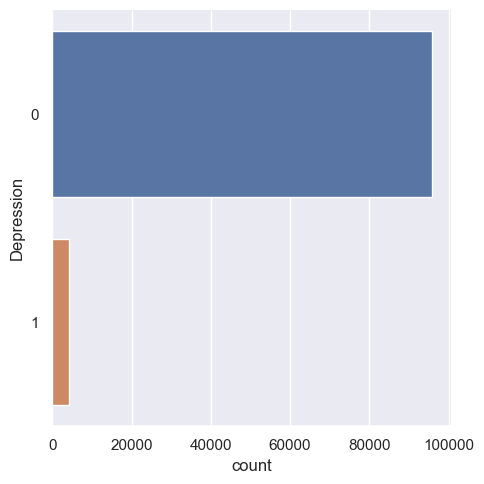

In [5]:
sb.catplot(y = 'Depression', data = depressionData, kind = "count")

In [6]:
count0, count1 = depressionData['Depression'].value_counts()
print("Ratio of classes is 0 : 1 = ", count0, ":", count1)

Ratio of classes is 0 : 1 =  95715 : 4285


<Axes: >

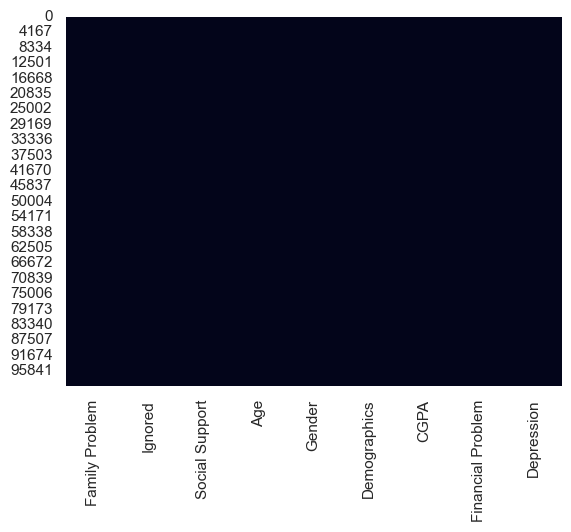

In [7]:
sb.heatmap(depressionData.isnull(), cbar=False) #if there is any white line, then there are missing values in the dataset

In [8]:
from sklearn.utils import resample

In [9]:
# Separate majority and minority classes
df_majority = depressionData[depressionData.Depression==0]
df_minority = depressionData[depressionData.Depression==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=95715,    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Depression.value_counts()

Depression
0    95715
1    95715
Name: count, dtype: int64

In [10]:
# random_state is used to set the random seed for reproducibility. 
#Setting a random seed ensures that the upsampling process produces the same results each time it's run, 
#which is useful for debugging and sharing code.)

In [11]:
# Numeric Predictors
df_upsampled['Age'].describe()

count    191430.000000
mean         41.473317
std          13.801865
min          18.000000
25%          30.000000
50%          42.000000
75%          53.000000
max          65.000000
Name: Age, dtype: float64

In [12]:
# Categorical Predictors
df_upsampled[['Family Problem','Ignored','Social Support','Gender','Demographics','CGPA','Financial Problem']].describe()

,Family Problem,Ignored,Social Support,Gender,Demographics,CGPA,Financial Problem
count,191430,191430,191430,191430,191430,191430,191430
unique,2,3,3,2,2,3,3
top,Yes,Sleep quality,Low_Social_Support,Male,Rural,High_CGPA,Significant_Financial_Problem
freq,110142,124502,69508,96044,102914,99301,89798


<Axes: xlabel='Age', ylabel='Count'>

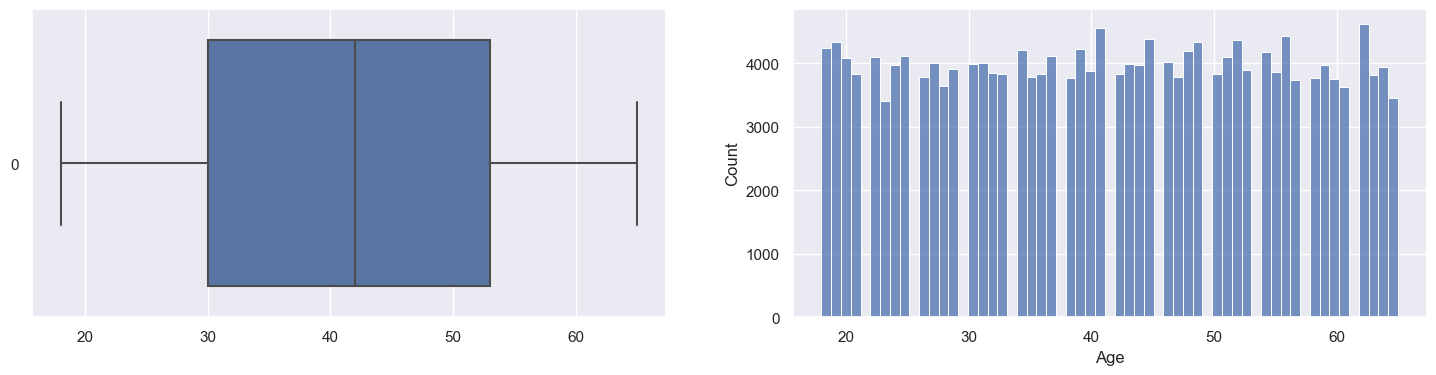

In [13]:
# Age 
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df_upsampled['Age'], orient = "h", ax = axes[0])
sb.histplot(data = df_upsampled['Age'], ax = axes[1])

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


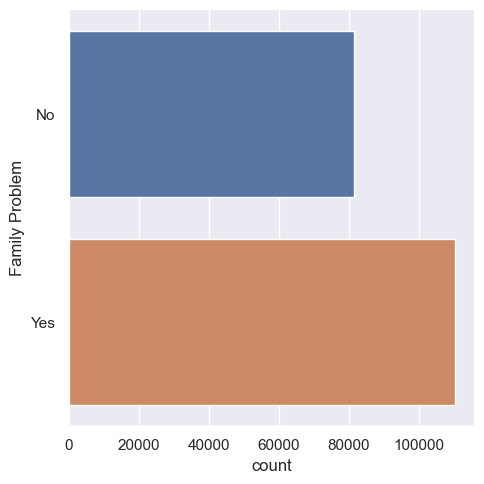

In [14]:
# Family Problem
sb.catplot(y = 'Family Problem', data = df_upsampled, kind = "count")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


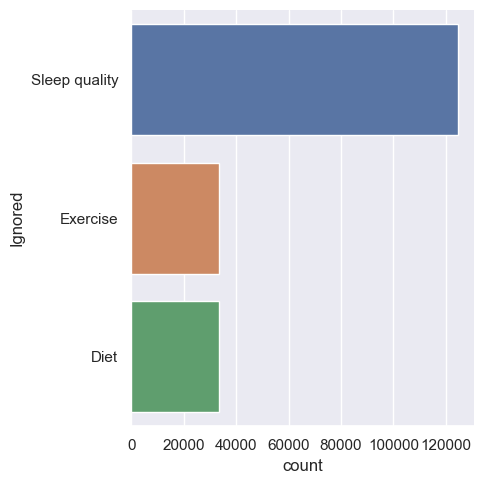

In [15]:
# Ignored
sb.catplot(y = 'Ignored', data = df_upsampled, kind = "count")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


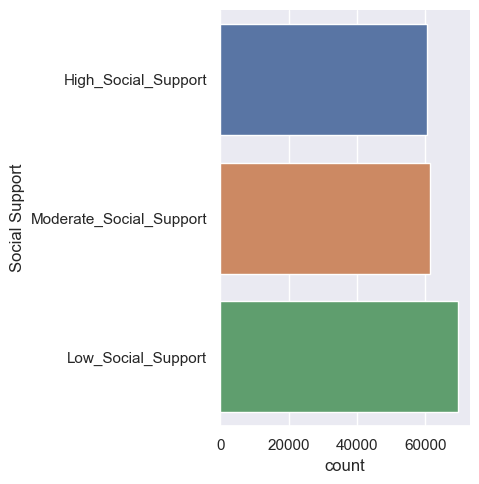

In [16]:
#Social Support
sb.catplot(y = 'Social Support', data = df_upsampled, kind = "count")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


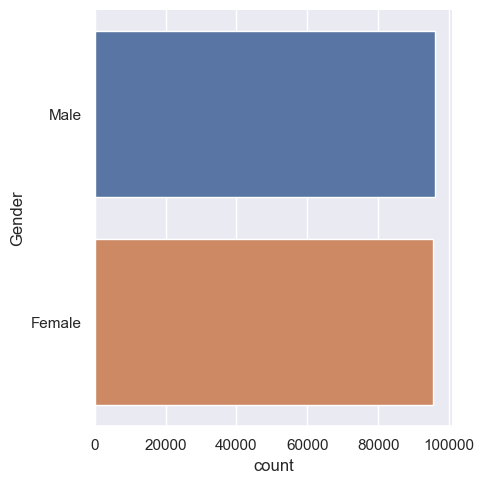

In [17]:
#Gender
sb.catplot(y = 'Gender', data = df_upsampled, kind = "count")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


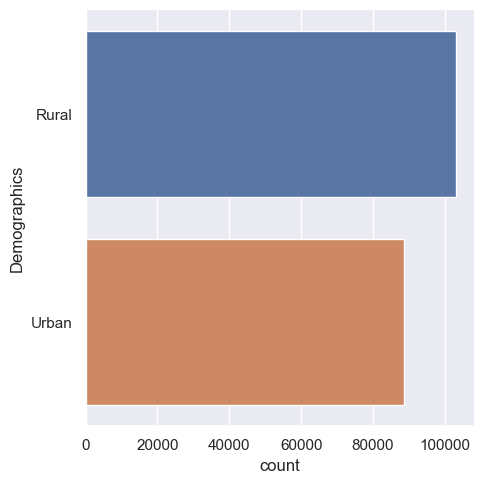

In [18]:
#Demographics
sb.catplot(y = 'Demographics', data = df_upsampled, kind = "count")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


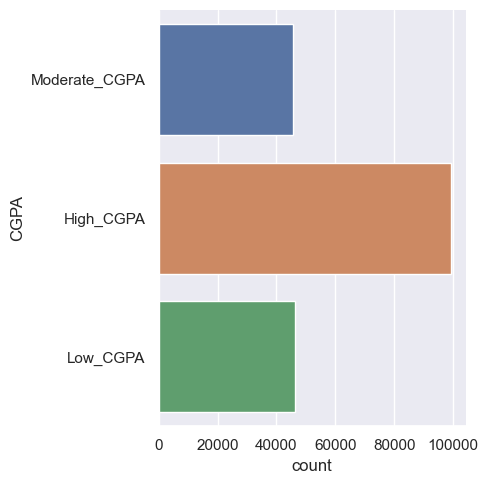

In [19]:
#CGPA
sb.catplot(y = 'CGPA', data = df_upsampled, kind = "count")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


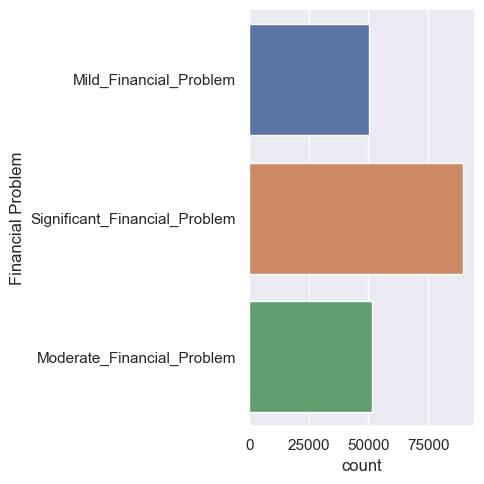

In [20]:
#Financial Problem
sb.catplot(y = 'Financial Problem', data = df_upsampled, kind = "count")

<Axes: xlabel='Depression', ylabel='Age'>

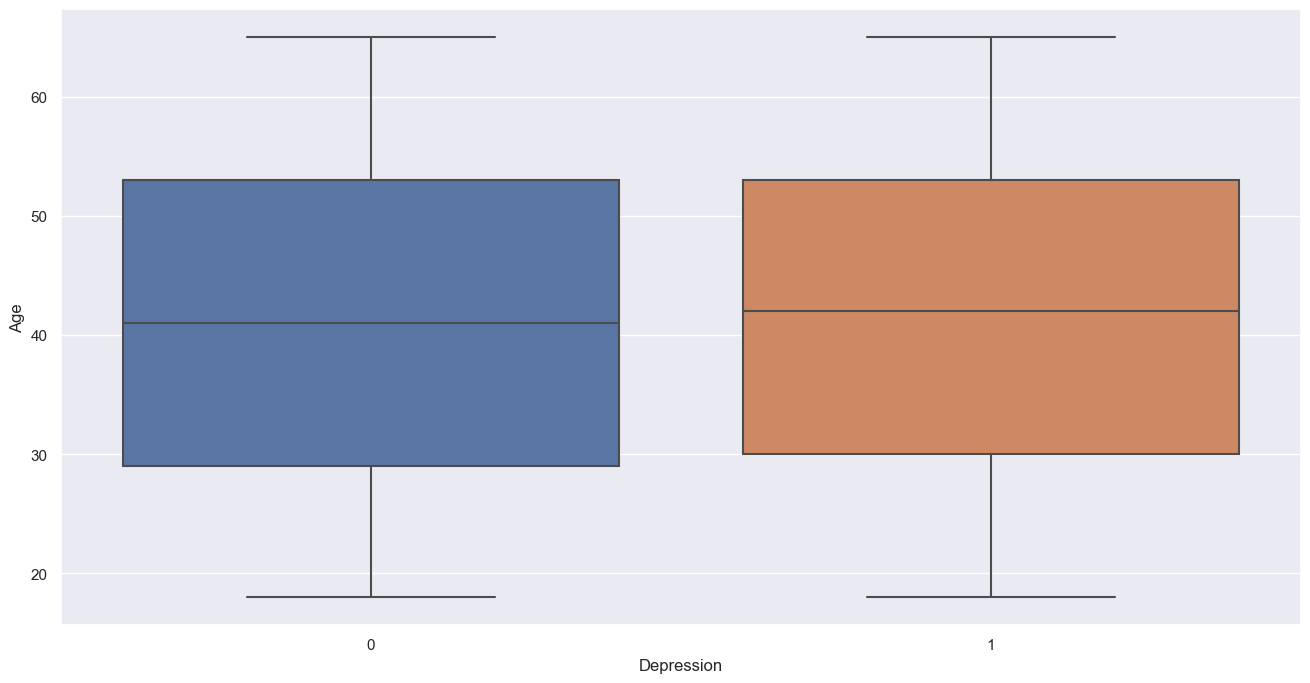

In [21]:
#Depression vs Age 
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Depression', y = 'Age', data = df_upsampled)

<Axes: xlabel='Financial Problem', ylabel='Depression'>

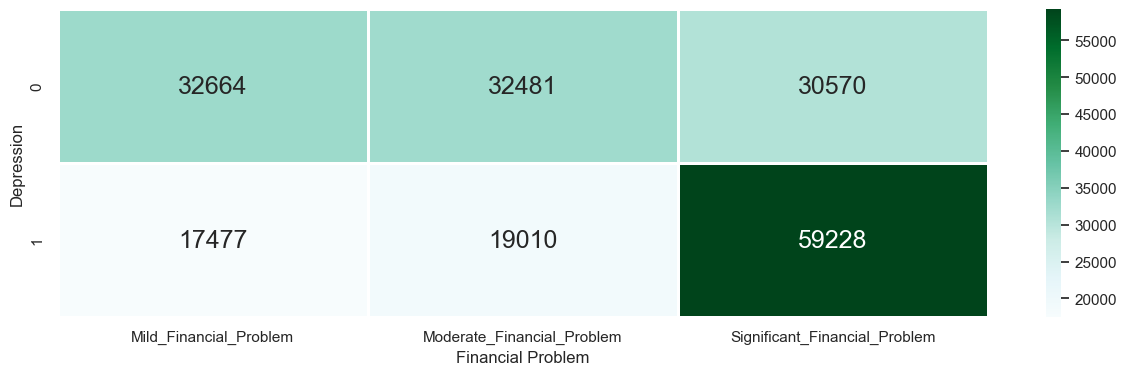

In [22]:
# Depression vs Financial Problem
f = plt.figure(figsize=(15, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Financial Problem']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Ignored', ylabel='Depression'>

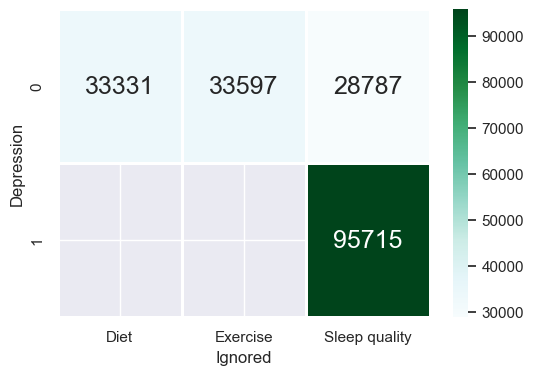

In [23]:
# Depression vs Ignored
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Ignored']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Social Support', ylabel='Depression'>

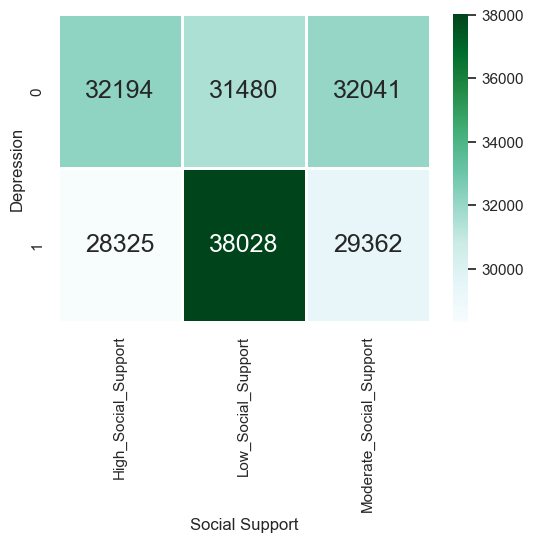

In [24]:
# Rating vs Social Support
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Social Support']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Depression', ylabel='count'>

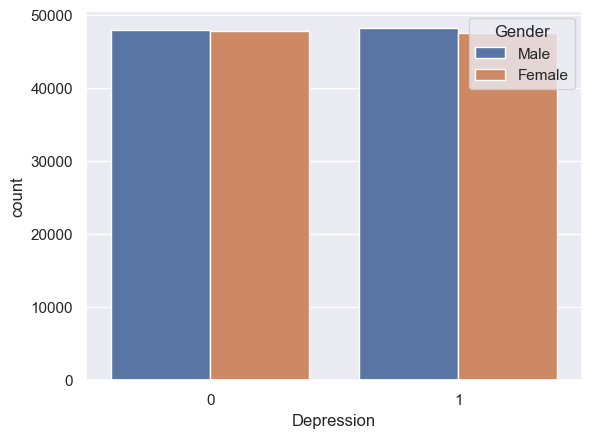

In [25]:
# Depression vs Gender
sb.countplot(x='Depression', hue='Gender', data=df_upsampled)#这个和下面那个图应该都能表明gender并不影响，所以应该把gender这栏删掉

<Axes: xlabel='Gender', ylabel='Depression'>

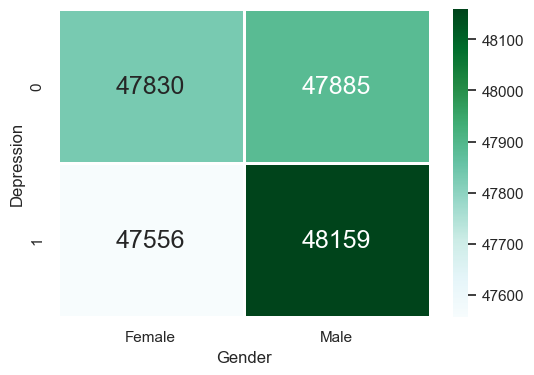

In [26]:
# Depression vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Family Problem', ylabel='Depression'>

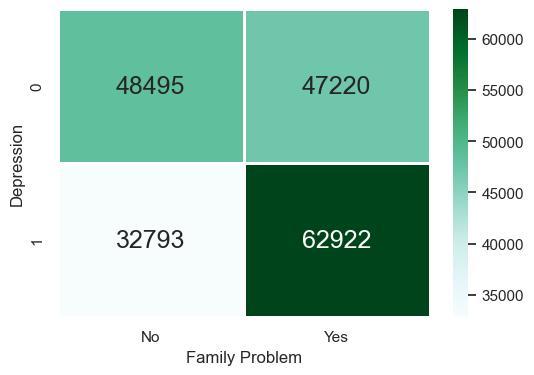

In [27]:
# Depression vs Family Problem
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Family Problem']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Demographics', ylabel='Depression'>

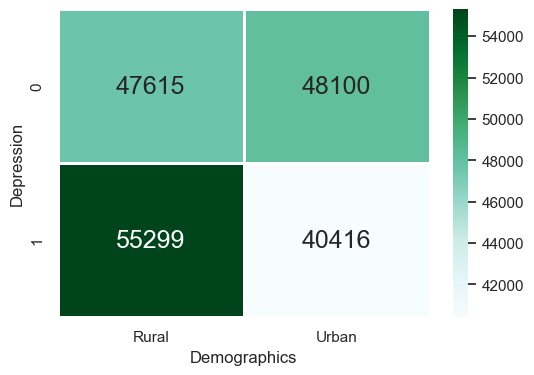

In [28]:
# Depression vs Demographics 
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Demographics']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='CGPA', ylabel='Depression'>

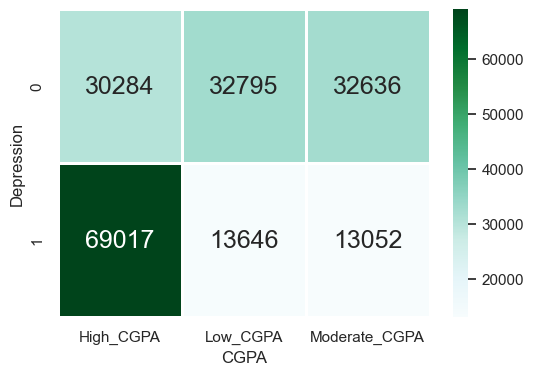

In [29]:
# Rating vs CGPA
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'CGPA']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Financial Problem', ylabel='Depression'>

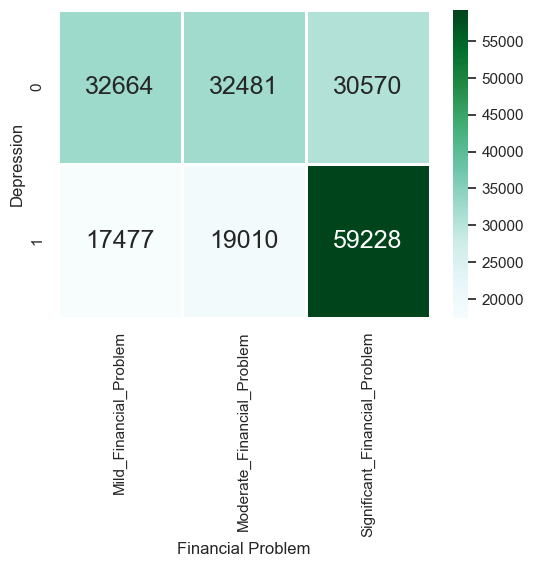

In [30]:
# Rating vs Financial Problem
f = plt.figure(figsize=(6, 4))
sb.heatmap(df_upsampled.groupby(['Depression', 'Financial Problem']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


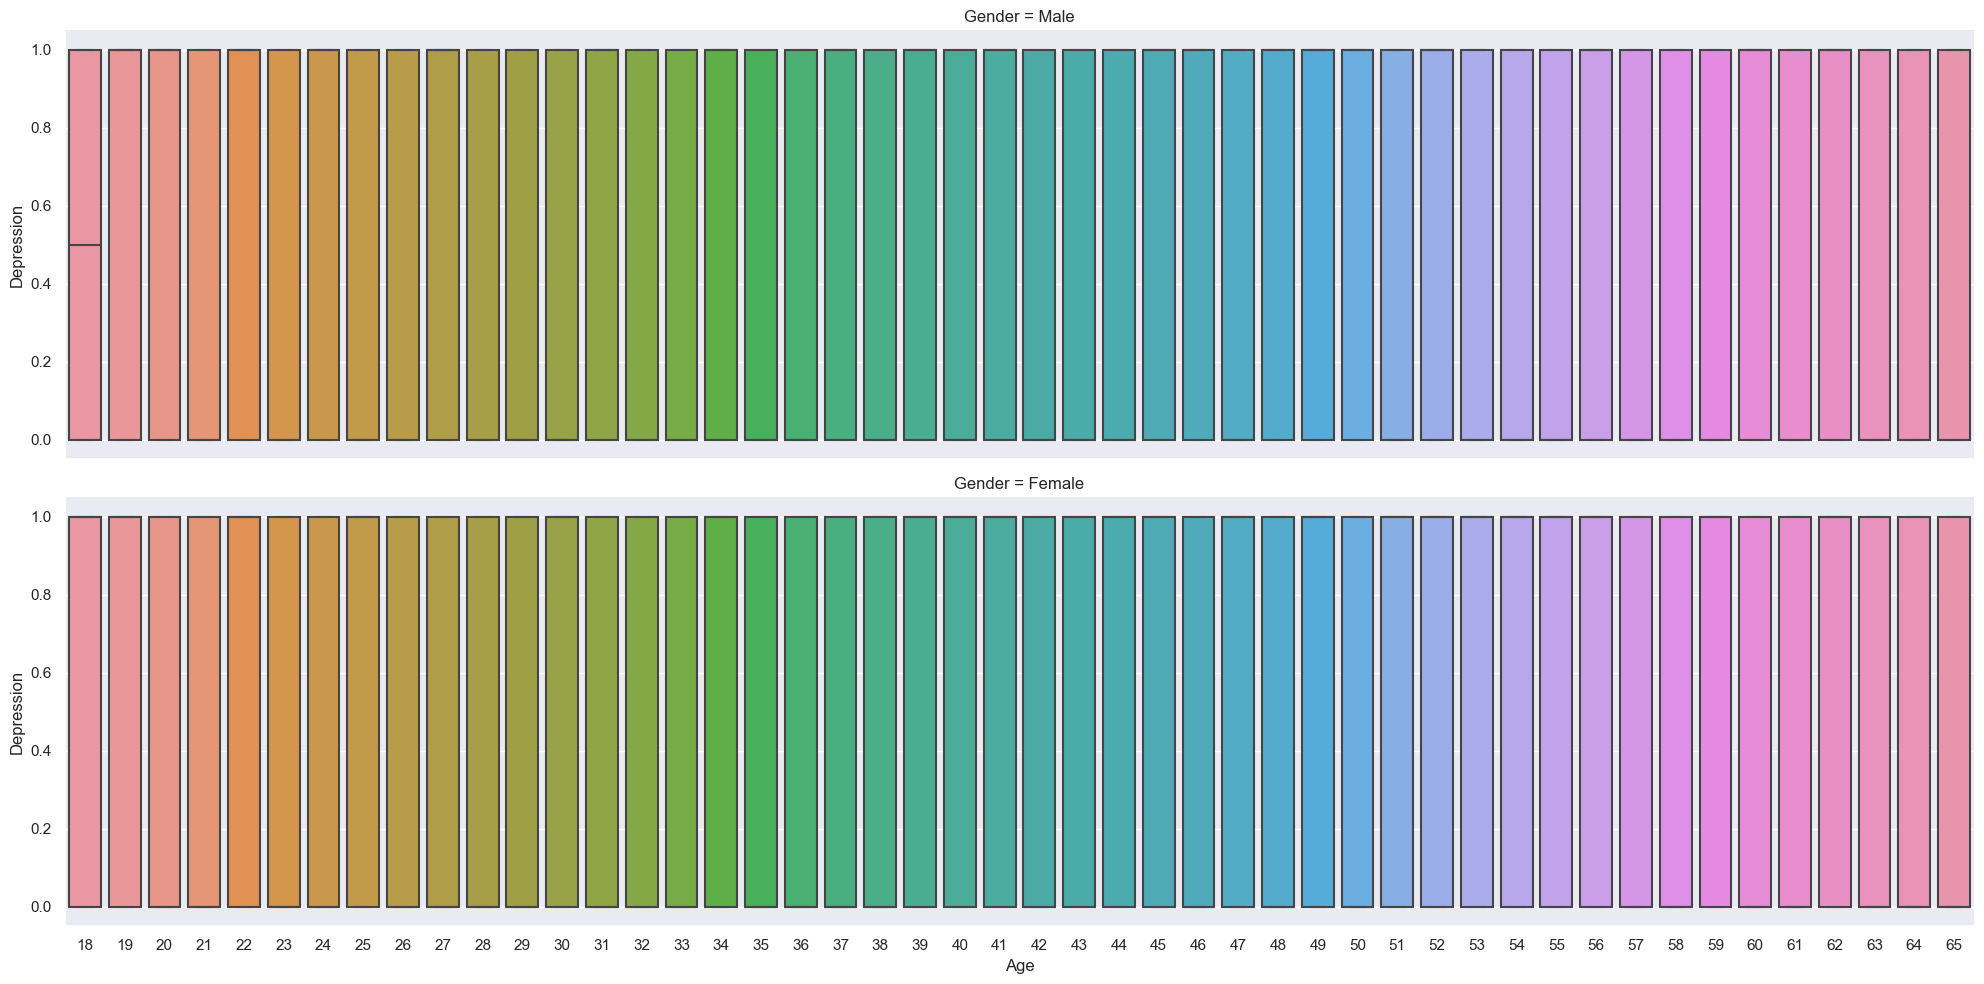

In [31]:
# Rating vs Age and Gender
sb.catplot(x = 'Age', y = 'Depression', row = 'Gender', data = df_upsampled, kind = 'box', aspect = 4)

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


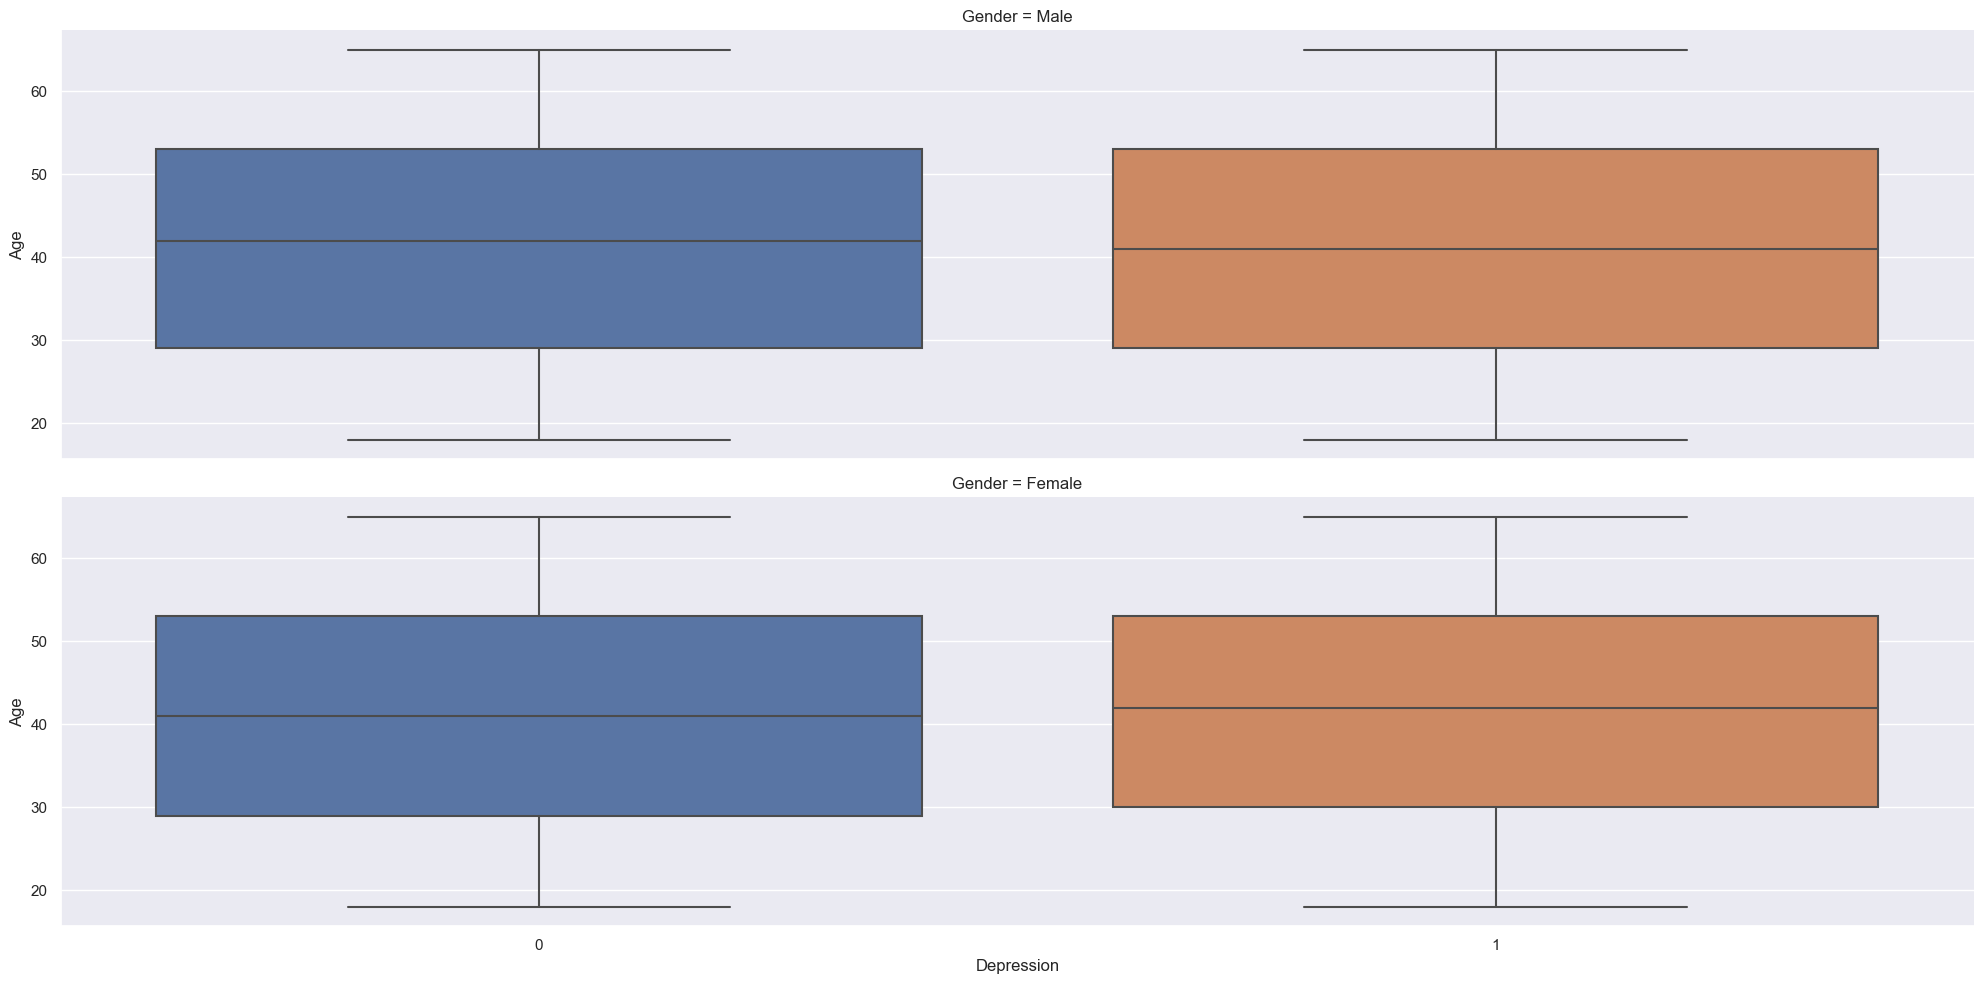

In [32]:
# Rating vs Age and Gender
sb.catplot(x = 'Depression', y = 'Age', row = 'Gender', data = df_upsampled, kind = 'box', aspect = 4)

In [33]:
#Building a Logistic Regression Model

In [34]:
#Removing Unnecessary Columns From The Data Set
#df_upsampled.drop(['Gender','Ignored'], axis = 1, inplace = True)

In [35]:
#Adding Dummy Variables to the pandas DataFrame
pd.get_dummies(df_upsampled['Family Problem'],drop_first = True).astype(int)
#astype(int) can Convert boolean values(False or True) to integers (0 or 1)

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
54448,1
40755,0
64879,1
60178,1


In [36]:
Family_Problem_data=pd.get_dummies(df_upsampled['Family Problem'],drop_first = True).astype(int)
df_upsampled = pd.concat([df_upsampled, Family_Problem_data], axis = 1)
df_upsampled.drop(['Family Problem'], axis = 1, inplace = True)
df_upsampled.head()

,Ignored,Social Support,Age,Gender,Demographics,CGPA,Financial Problem,Depression,Yes
0,Sleep quality,High_Social_Support,38,Male,Rural,Moderate_CGPA,Mild_Financial_Problem,0,0
1,Sleep quality,High_Social_Support,51,Male,Urban,High_CGPA,Mild_Financial_Problem,0,0
2,Exercise,Moderate_Social_Support,32,Female,Urban,High_CGPA,Significant_Financial_Problem,0,1
3,Exercise,High_Social_Support,64,Female,Rural,Moderate_CGPA,Moderate_Financial_Problem,0,0
4,Sleep quality,Low_Social_Support,31,Male,Rural,Moderate_CGPA,Moderate_Financial_Problem,0,1


In [37]:
pd.get_dummies(df_upsampled['Ignored'],drop_first = True).astype(int)

,Exercise,Sleep quality
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
54448,0,1
40755,0,1
64879,0,1
60178,0,1


In [38]:
pd.get_dummies(df_upsampled['Social Support'],drop_first = True).astype(int)

,Low_Social_Support,Moderate_Social_Support
0,0,0
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
54448,0,0
40755,0,1
64879,0,0
60178,1,0


In [39]:
pd.get_dummies(df_upsampled['Gender'],drop_first = True).astype(int)

,Male
0,1
1,1
2,0
3,0
4,1
...,...
54448,1
40755,0
64879,1
60178,1


In [40]:
pd.get_dummies(df_upsampled['Demographics'],drop_first = True).astype(int)

,Urban
0,0
1,1
2,1
3,0
4,0
...,...
54448,0
40755,0
64879,1
60178,1


In [41]:
pd.get_dummies(df_upsampled['CGPA'],drop_first = True).astype(int)

,Low_CGPA,Moderate_CGPA
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
54448,0,1
40755,0,1
64879,0,0
60178,1,0


In [42]:
pd.get_dummies(df_upsampled['Financial Problem'],drop_first = True).astype(int)

,Moderate_Financial_Problem,Significant_Financial_Problem
0,0,0
1,0,0
2,0,1
3,1,0
4,1,0
...,...,...
54448,0,1
40755,0,1
64879,0,1
60178,0,1


In [43]:
df_upsampled.head()

,Ignored,Social Support,Age,Gender,Demographics,CGPA,Financial Problem,Depression,Yes
0,Sleep quality,High_Social_Support,38,Male,Rural,Moderate_CGPA,Mild_Financial_Problem,0,0
1,Sleep quality,High_Social_Support,51,Male,Urban,High_CGPA,Mild_Financial_Problem,0,0
2,Exercise,Moderate_Social_Support,32,Female,Urban,High_CGPA,Significant_Financial_Problem,0,1
3,Exercise,High_Social_Support,64,Female,Rural,Moderate_CGPA,Moderate_Financial_Problem,0,0
4,Sleep quality,Low_Social_Support,31,Male,Rural,Moderate_CGPA,Moderate_Financial_Problem,0,1


In [44]:
Ignored_data=pd.get_dummies(df_upsampled['Ignored'],drop_first = True).astype(int)
Social_Support_data=pd.get_dummies(df_upsampled['Social Support'],drop_first = True).astype(int)
Gender_data=pd.get_dummies(df_upsampled['Gender'],drop_first = True).astype(int)
Demographics_data=pd.get_dummies(df_upsampled['Demographics'],drop_first = True).astype(int)
CGPA_data=pd.get_dummies(df_upsampled['CGPA'],drop_first = True).astype(int)
Financial_Problem_data=pd.get_dummies(df_upsampled['Financial Problem'],drop_first = True).astype(int)

In [45]:
#concatenate these data columns into the existing pandas DataFrame
df_upsampled = pd.concat([df_upsampled, Ignored_data], axis = 1)
df_upsampled = pd.concat([df_upsampled, Social_Support_data], axis = 1)
df_upsampled = pd.concat([df_upsampled, Gender_data], axis = 1)
df_upsampled = pd.concat([df_upsampled, Demographics_data], axis = 1)
df_upsampled = pd.concat([df_upsampled, CGPA_data], axis = 1)
df_upsampled = pd.concat([df_upsampled, Financial_Problem_data], axis = 1)

#drop the original colums
df_upsampled.drop(['Ignored'], axis = 1, inplace = True)
df_upsampled.drop(['Social Support'], axis = 1, inplace = True)
df_upsampled.drop(['Gender'], axis = 1, inplace = True)
df_upsampled.drop(['Demographics'], axis = 1, inplace = True)
df_upsampled.drop(['CGPA'], axis = 1, inplace = True)
df_upsampled.drop(['Financial Problem'], axis = 1, inplace = True)
df_upsampled.head()

,Age,Depression,Yes,Exercise,Sleep quality,Low_Social_Support,Moderate_Social_Support,Male,Urban,Low_CGPA,Moderate_CGPA,Moderate_Financial_Problem,Significant_Financial_Problem
0,38,0,0,0,1,0,0,1,0,0,1,0,0
1,51,0,0,0,1,0,0,1,1,0,0,0,0
2,32,0,1,1,0,0,1,0,1,0,0,0,1
3,64,0,0,1,0,0,0,0,0,0,1,1,0
4,31,0,1,0,1,1,0,1,0,0,1,1,0


In [46]:
#divide our data into x values (the data we will be using to make predictions) 
#and y values (the data we are attempting to predict).

In [47]:
y_data = df_upsampled['Depression']

x_data = df_upsampled.drop('Depression', axis = 1)

In [48]:
from sklearn.model_selection import train_test_split
#generate our training data and test data,the test data is 30% of the original data
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [49]:
#Training the Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression
#create our model by instantiating an instance of the LogisticRegression object:
model = LogisticRegression()
#To train the model, we need to call the fit method on 
#the LogisticRegression object we just created and pass in our x_training_data and y_training_data variables,
#like this:
model.fit(x_training_data, y_training_data)
#Our model has now been trained.

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#make a set of predictions on our test data
predictions = model.predict(x_test_data)
#Our predictions have been made. Examine the accuracy of our model next.

In [52]:
#Measuring the Performance of a Logistic Regression Machine Learning Model
from sklearn.metrics import classification_report
#calculate the performance metrics for our logistic regression machine learning module
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       0.91      0.83      0.87     28778\n           1       0.84      0.92      0.88     28651\n\n    accuracy                           0.88     57429\n   macro avg       0.88      0.88      0.87     57429\nweighted avg       0.88      0.88      0.87     57429\n'

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data, predictions))
#TN,FP
#FN,TP

[[23943  4835]
 [ 2335 26316]]


In [54]:
#obtain the accuracy of the model, which tells us the percentage of correction predictions the model made:
#Accuracy=（TN+TP）/(TN+FP+FN+TP)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_data, predictions))

Accuracy: 0.8751501854463772


In [55]:
#This tells us that the model made the correct prediction 71.6% of the time.

In [56]:
#Lastly, we can plot the ROC (Receiver Operating Characteristic) Curve which displays 
#the percentage of true positives predicted by the model as the prediction probability cutoff 
#is lowered from 1 to 0.
#The higher the AUC (area under the curve), the more accurately our model is able to predict outcomes:

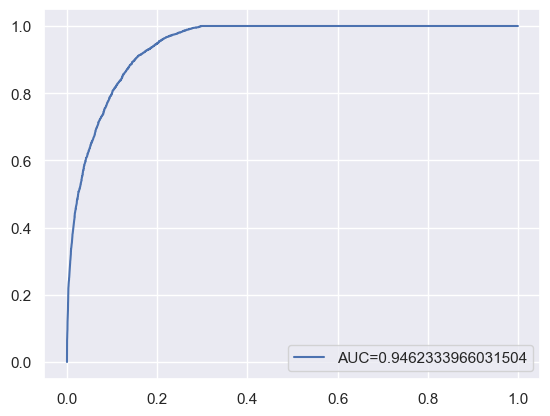

In [57]:
#define metrics
y_pred_proba = model.predict_proba(x_test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_data,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_data, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

[Text(0.375, 0.875, 'Sleep quality <= 0.5\ngini = 0.5\nsamples = 134001\nvalue = [66856, 67145]\nclass = Good'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 46816\nvalue = [46816, 0]\nclass = Bad'),
 Text(0.5, 0.625, 'Significant_Financial_Problem <= 0.5\ngini = 0.354\nsamples = 87185\nvalue = [20040, 67145]\nclass = Good'),
 Text(0.25, 0.375, 'Low_CGPA <= 0.5\ngini = 0.459\nsamples = 39810\nvalue = [14215, 25595]\nclass = Good'),
 Text(0.125, 0.125, 'gini = 0.416\nsamples = 31439\nvalue = [9271, 22168]\nclass = Good'),
 Text(0.375, 0.125, 'gini = 0.484\nsamples = 8371\nvalue = [4944, 3427]\nclass = Bad'),
 Text(0.75, 0.375, 'Moderate_CGPA <= 0.5\ngini = 0.216\nsamples = 47375\nvalue = [5825, 41550]\nclass = Good'),
 Text(0.625, 0.125, 'gini = 0.164\nsamples = 39316\nvalue = [3533, 35783]\nclass = Good'),
 Text(0.875, 0.125, 'gini = 0.407\nsamples = 8059\nvalue = [2292, 5767]\nclass = Good')]

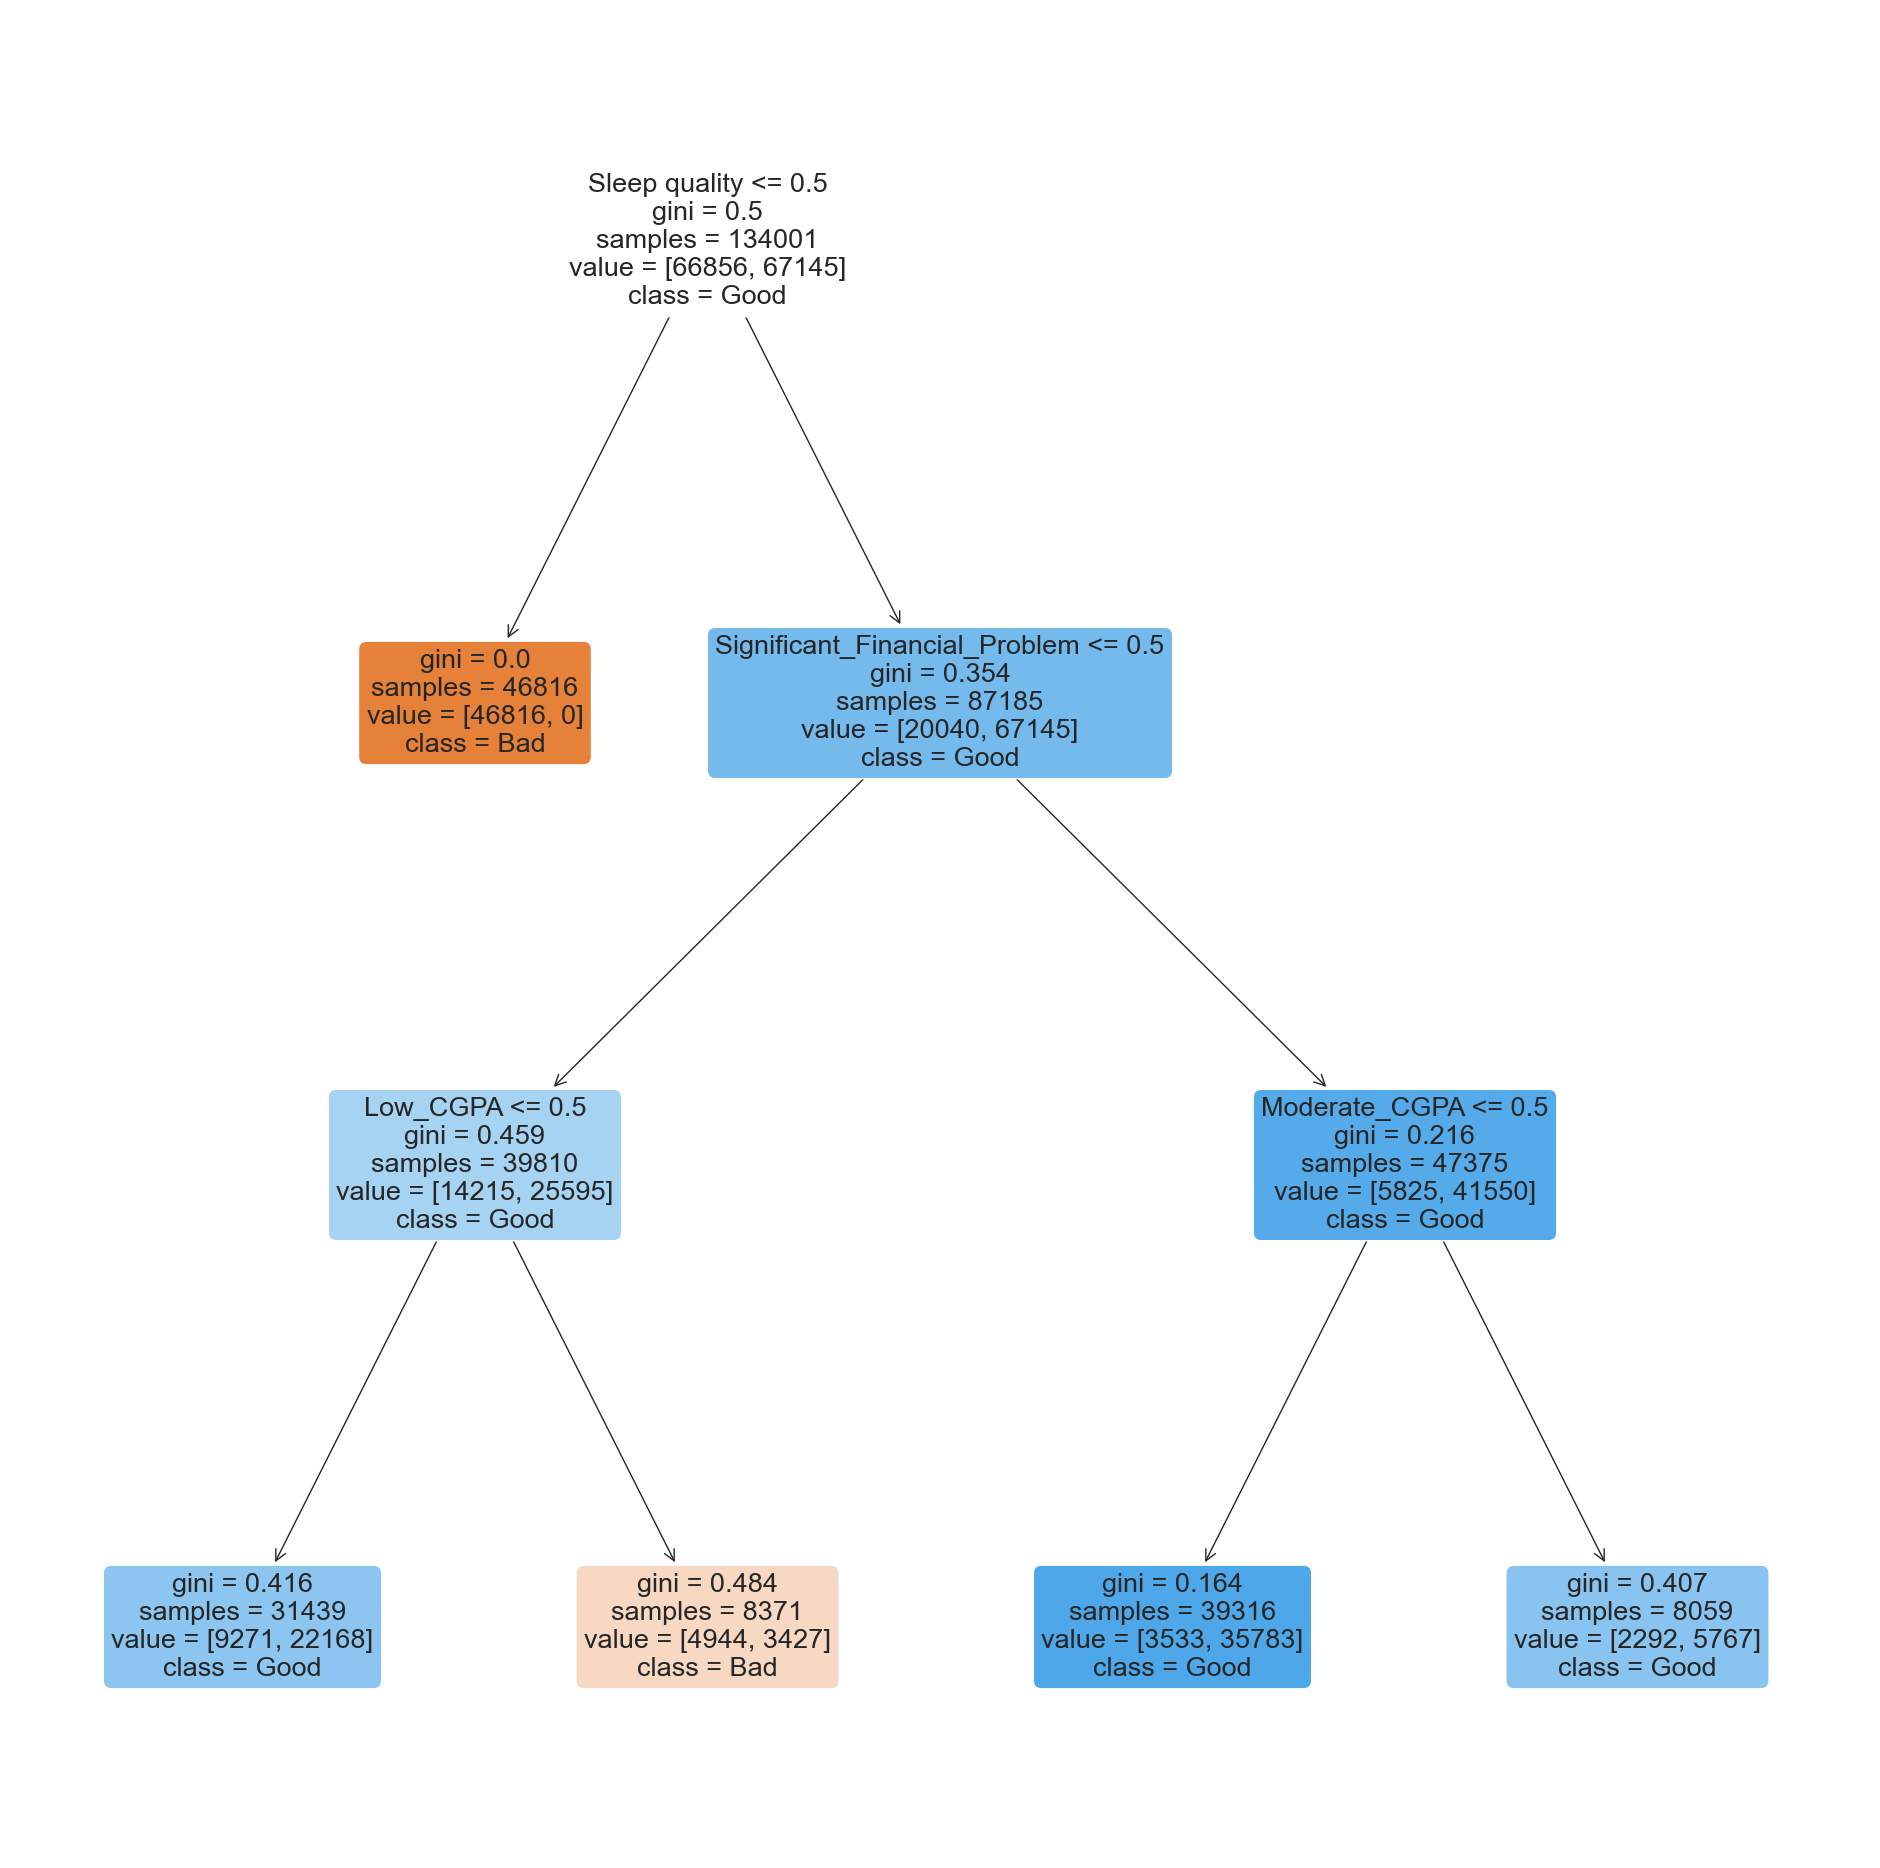

In [58]:
#Creating a Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

y_data = df_upsampled['Depression']
x_data = df_upsampled.drop('Depression', axis = 1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(x_training_data, y_training_data)                  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
           feature_names=x_training_data.columns.tolist(), 
          class_names=["Bad","Good"])

Accuracy  :	 0.8617696882859083
TPR Train :	 0.94896120336585
TNR Train :	 0.7742012683977504

FPR Train :	 0.2257987316022496
FNR Train :	 0.05103879663414997


<Axes: >

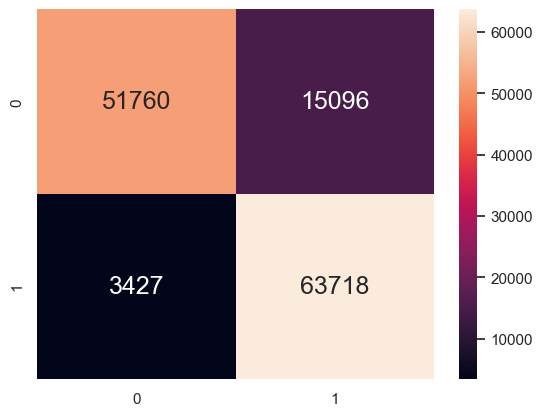

In [59]:
y_train_pred = dectree.predict(x_training_data)
print("Accuracy  :\t", dectree.score(x_training_data, y_training_data))

cmTrain = confusion_matrix(y_training_data, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


sb.heatmap(confusion_matrix(y_training_data, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8592174685263543
TPR Test :	 0.9474273713685685
TNR Test :	 0.7718909179112236

FPR Test :	 0.22810908208877648
FNR Test :	 0.05257262863143157


<Axes: >

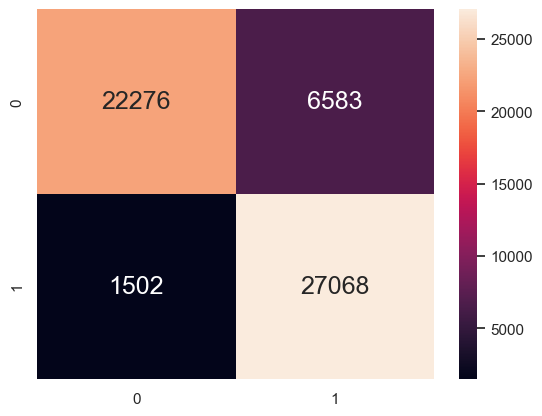

In [60]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test_data)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test_data, y_test_data))
cmTest = confusion_matrix(y_test_data, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


sb.heatmap(confusion_matrix(y_test_data, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.4375, 0.9, 'Sleep quality <= 0.5\ngini = 0.5\nsamples = 134001\nvalue = [67107, 66894]\nclass = Bad'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 46897\nvalue = [46897, 0]\nclass = Bad'),
 Text(0.5, 0.7, 'Significant_Financial_Problem <= 0.5\ngini = 0.356\nsamples = 87104\nvalue = [20210, 66894]\nclass = Good'),
 Text(0.25, 0.5, 'Moderate_CGPA <= 0.5\ngini = 0.46\nsamples = 39819\nvalue = [14289, 25530]\nclass = Good'),
 Text(0.125, 0.3, 'Low_CGPA <= 0.5\ngini = 0.416\nsamples = 31494\nvalue = [9297, 22197]\nclass = Good'),
 Text(0.0625, 0.1, 'gini = 0.307\nsamples = 23148\nvalue = [4384, 18764]\nclass = Good'),
 Text(0.1875, 0.1, 'gini = 0.484\nsamples = 8346\nvalue = [4913, 3433]\nclass = Bad'),
 Text(0.375, 0.3, 'Yes <= 0.5\ngini = 0.48\nsamples = 8325\nvalue = [4992, 3333]\nclass = Bad'),
 Text(0.3125, 0.1, 'gini = 0.398\nsamples = 3447\nvalue = [2501, 946]\nclass = Bad'),
 Text(0.4375, 0.1, 'gini = 0.5\nsamples = 4878\nvalue = [2491, 2387]\nclass = Bad'),
 Text(0.75, 0.5, 'M

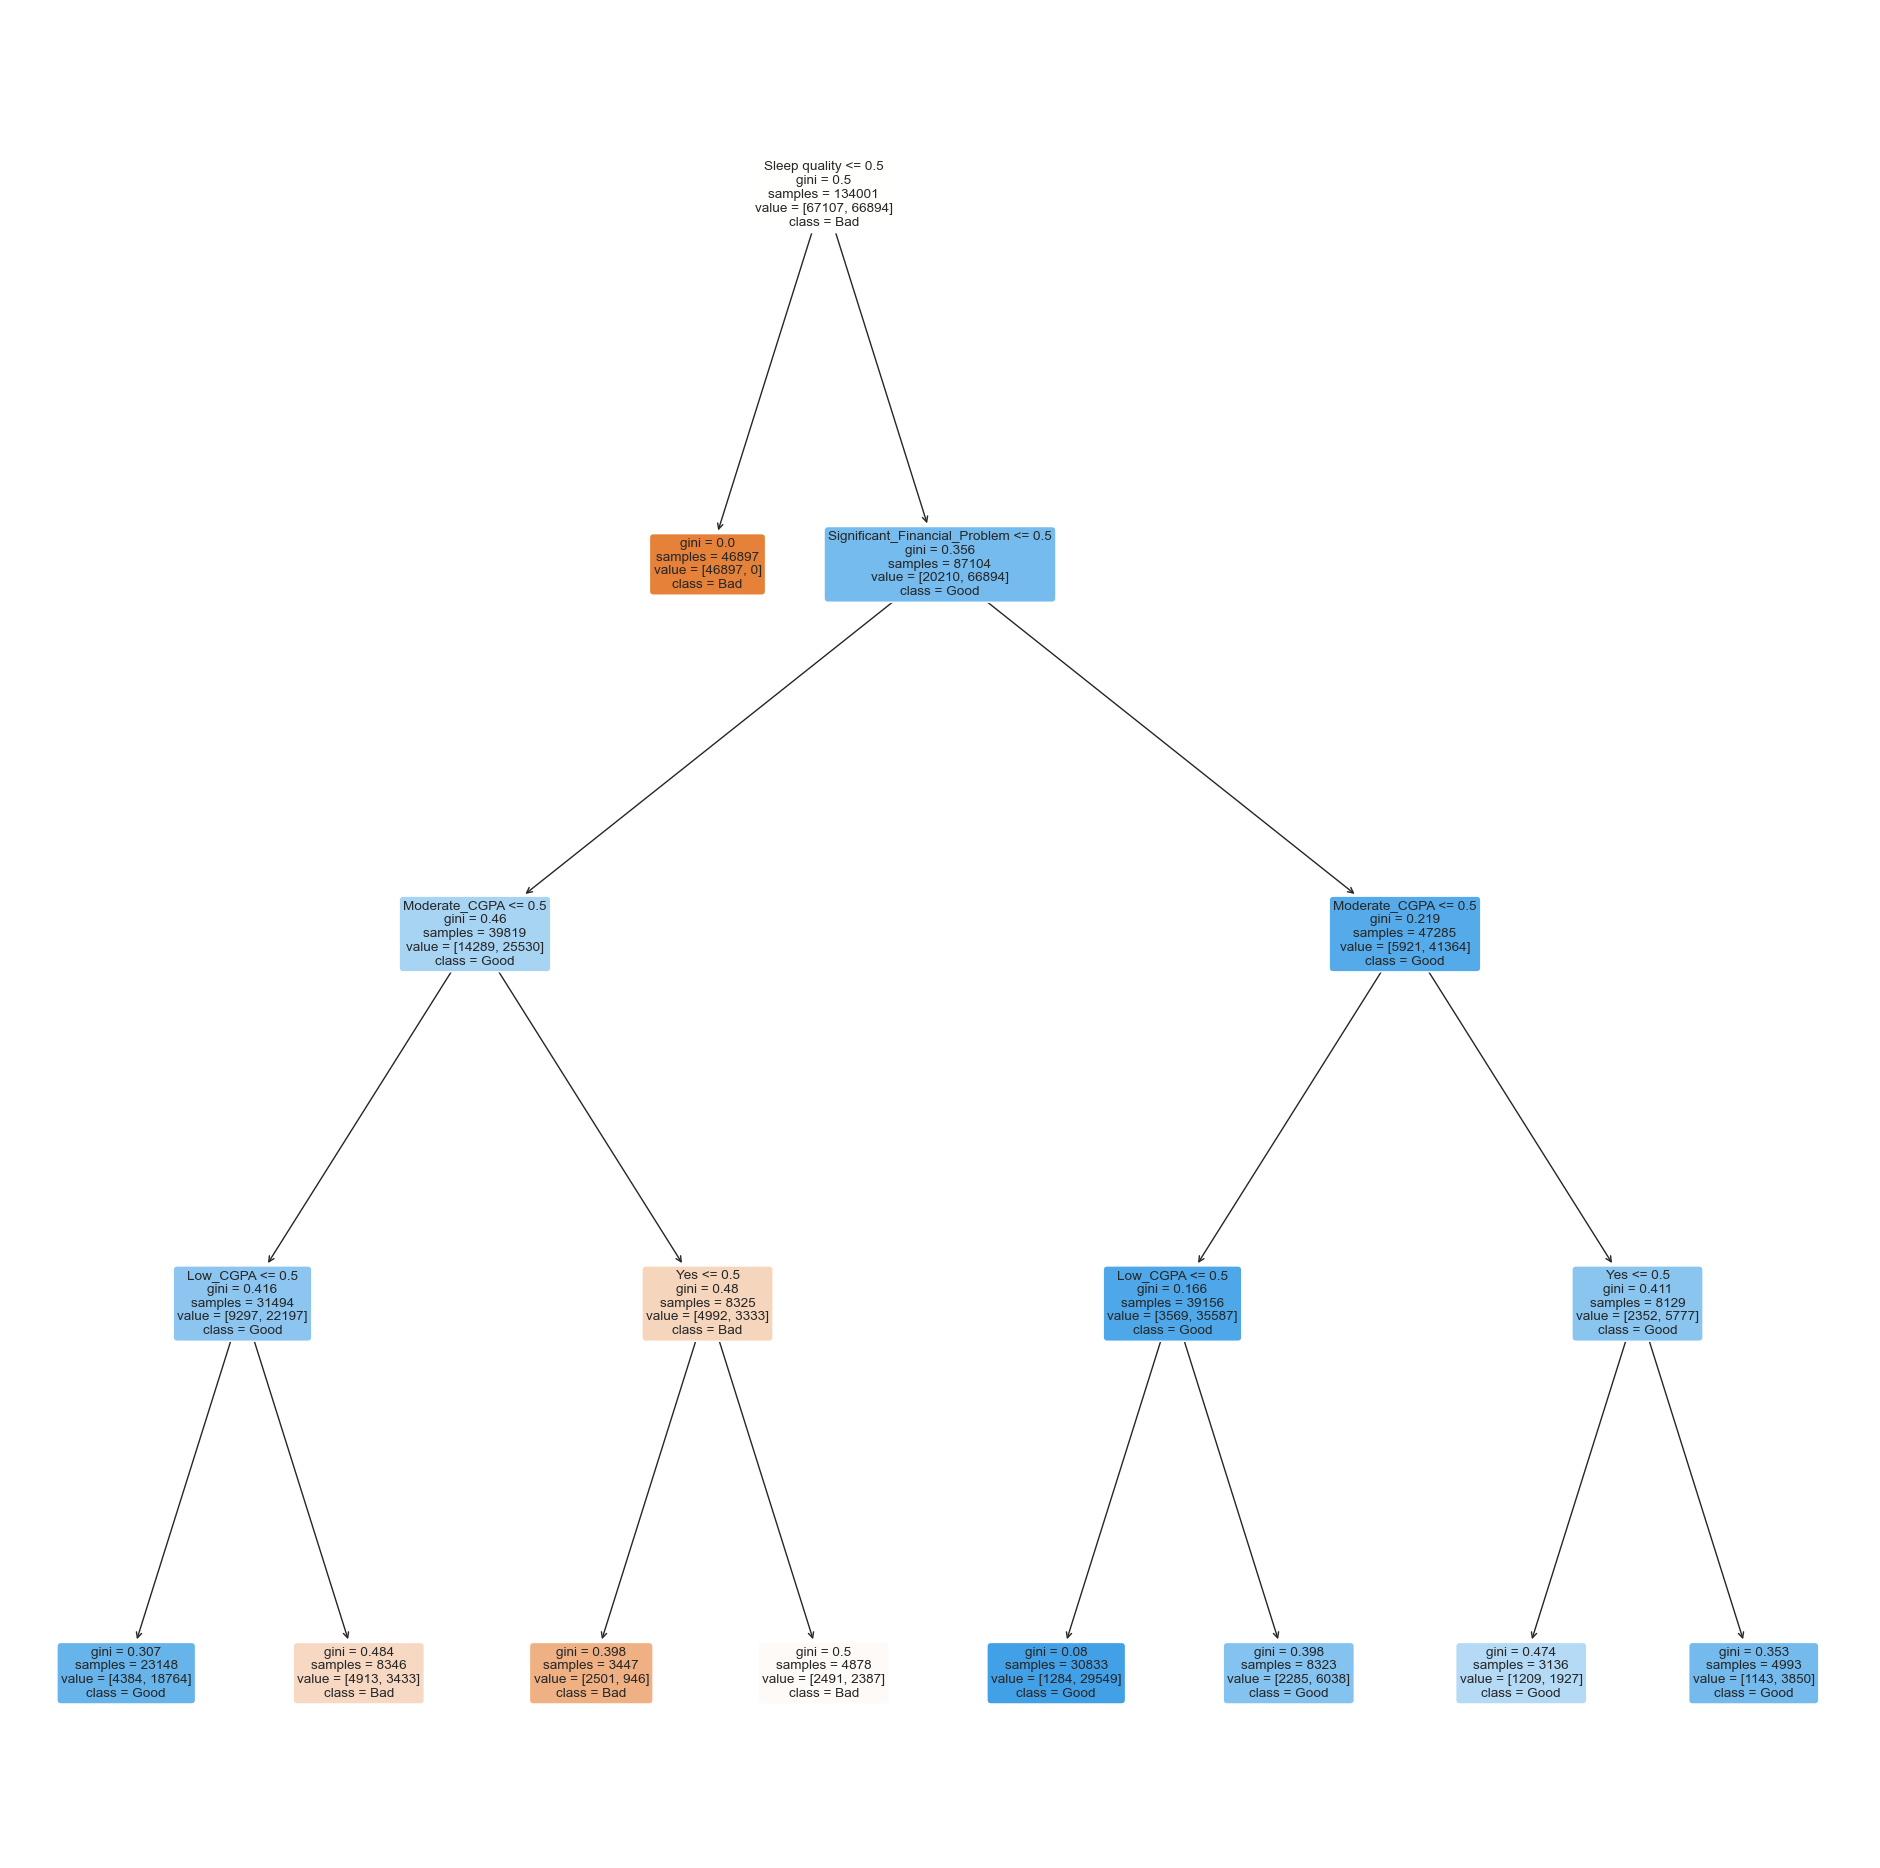

In [61]:
#Increacing the depth of the Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

y_data = df_upsampled['Depression']
x_data = df_upsampled.drop('Depression', axis = 1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(x_training_data, y_training_data)                  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
           feature_names=x_training_data.columns.tolist(), 
          class_names=["Bad","Good"])


Train Data
Accuracy  :	 0.8726054283176992
TPR Train :	 0.8988549047747182
TNR Train :	 0.8464392686306943

FPR Train :	 0.15356073136930573
FNR Train :	 0.10114509522528178


<Axes: >

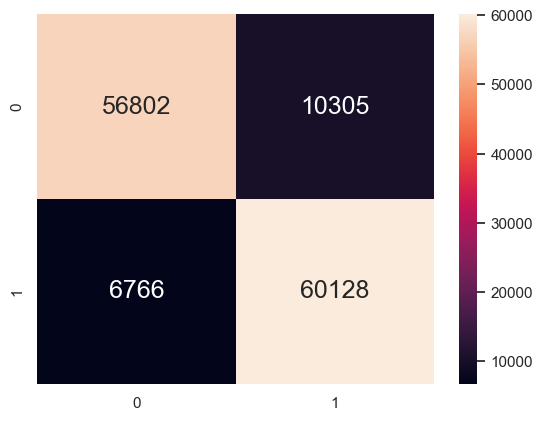

In [62]:
y_train_pred = dectree.predict(x_training_data)
print("Train Data")
print("Accuracy  :\t", dectree.score(x_training_data, y_training_data))

cmTrain = confusion_matrix(y_training_data, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


sb.heatmap(confusion_matrix(y_training_data, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



Test Data
Accuracy  :	 0.8725730902505703
TPR Test :	 0.8954234759376843
TNR Test :	 0.8495525727069351

FPR Test :	 0.15044742729306487
FNR Test :	 0.10457652406231567


<Axes: >

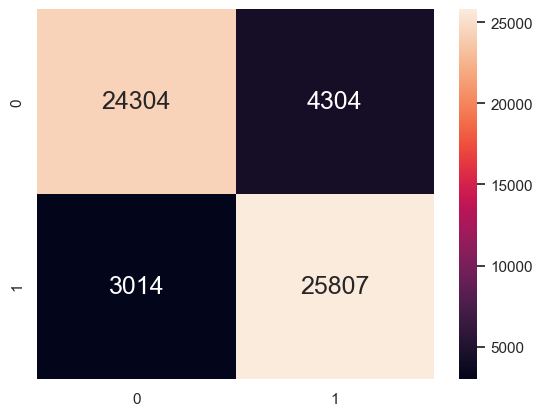

In [63]:
from sklearn.metrics import confusion_matrix


y_test_pred = dectree.predict(x_test_data)


print("Test Data")
print("Accuracy  :\t", dectree.score(x_test_data, y_test_data))
cmTest = confusion_matrix(y_test_data, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


sb.heatmap(confusion_matrix(y_test_data, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [68]:
#Creating a Random Forest
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators = 400,   
                                 max_depth = 10)       
# Fit Random Forest on Train Data
rforest.fit(x_training_data, y_training_data.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.8970455444362355
TPR Train :	 0.9571261996591622
TNR Train :	 0.8371555873455824

FPR Train :	 0.16284441265441757
FNR Train :	 0.042873800340837744


<Axes: >

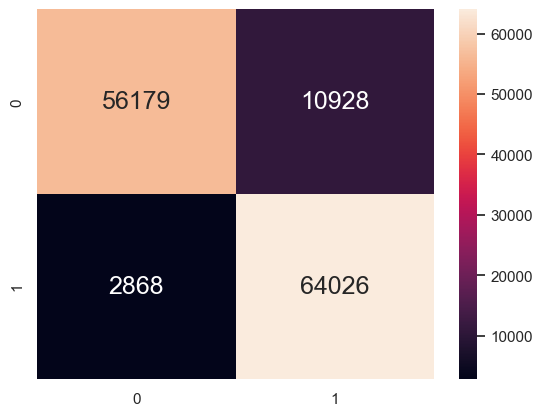

In [69]:
y_train_pred = rforest.predict(x_training_data)
print("Train Data")
print("Accuracy  :\t", rforest.score(x_training_data, y_training_data))

cmTrain = confusion_matrix(y_training_data, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


sb.heatmap(confusion_matrix(y_training_data, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.8963763952010309
TPR Test :	 0.9541306686096943
TNR Test :	 0.8381921140939598

FPR Test :	 0.16180788590604026
FNR Test :	 0.04586933139030568


<Axes: >

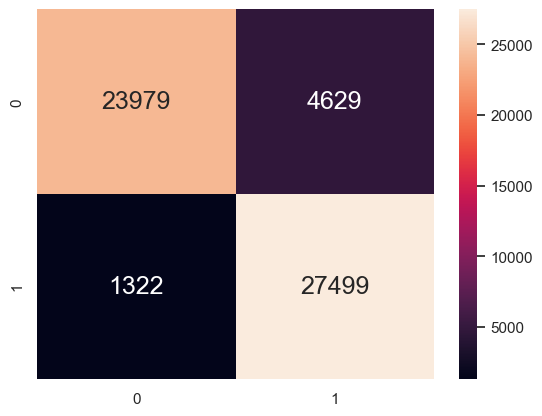

In [70]:
y_test_pred = rforest.predict(x_test_data)


print("Test Data")
print("Accuracy  :\t", rforest.score(x_test_data, y_test_data))
cmTest = confusion_matrix(y_test_data, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


sb.heatmap(confusion_matrix(y_test_data, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})